In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df=pd.read_csv("E:\PRACTICE\hiring.csv")
df

,EXPERIENCE,TEST_SCORE,INTERVIEW_SCORE,SALARY($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


###DATA CLEANING OR PREPROCESSING OF DATA

In [3]:
df.EXPERIENCE=df.EXPERIENCE.replace({"two":2,"three":3,"five":5,"seven":7,"ten":10,"eleven":11})

In [4]:
df

,EXPERIENCE,TEST_SCORE,INTERVIEW_SCORE,SALARY($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [5]:
df.EXPERIENCE=df.EXPERIENCE.fillna(0)
df

,EXPERIENCE,TEST_SCORE,INTERVIEW_SCORE,SALARY($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [6]:
df.TEST_SCORE=df.TEST_SCORE.fillna(df.TEST_SCORE.median())
df

,EXPERIENCE,TEST_SCORE,INTERVIEW_SCORE,SALARY($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


DATA ANALYSIS AND CORRELATION

<AxesSubplot: >

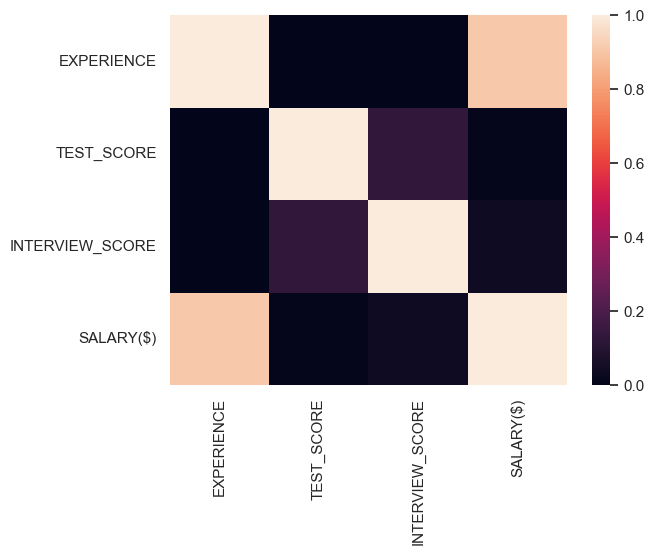

In [7]:
cor=df.corr()
sns.heatmap(cor,vmin=0,vmax=1)

###THIS SHOWS THAT TEST_SCORE AND INTERVIEW_SCORE DOESN'T PLAY THAT MUCH ROLE IN DETERMINATION OF SALARY WHEN COMPARED TO EXPERIENCE

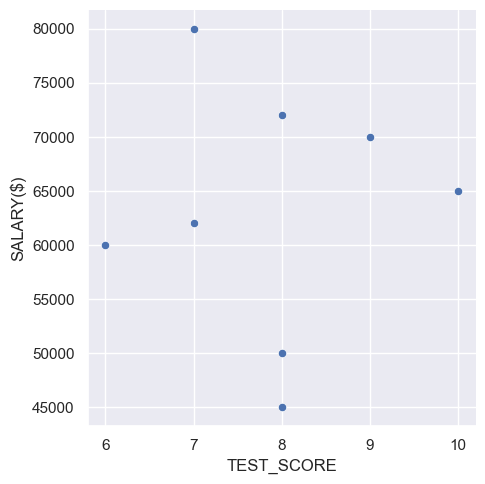

In [8]:
sns.relplot(df[["TEST_SCORE","SALARY($)"]],x="TEST_SCORE",y="SALARY($)")

###THIS SHOWS EVEN WITH 7 TEST SCORE YOU CAN GET BOTH HIGH SALARY OF 80000 AS WELL AS WITH 8 TEST SCORE YOU CAN GET LOW SALARY OF 45000. SO IT REALLY DEPENDS ON EXPERIENCE BUT ALSO IT HAVE SOME SIGNIFICANT IMPACT IN THE DETERMINATION OF SALARY

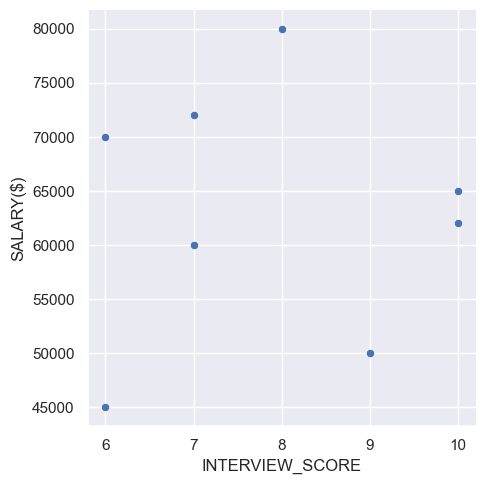

In [9]:
sns.relplot(df[["INTERVIEW_SCORE","SALARY($)"]],x="INTERVIEW_SCORE",y="SALARY($)")

###THIS AGAIN SHOWS THAT INTERVIEW SCORE DOESN'T MATTER MUCH ON DETERMINATION OF SALARY

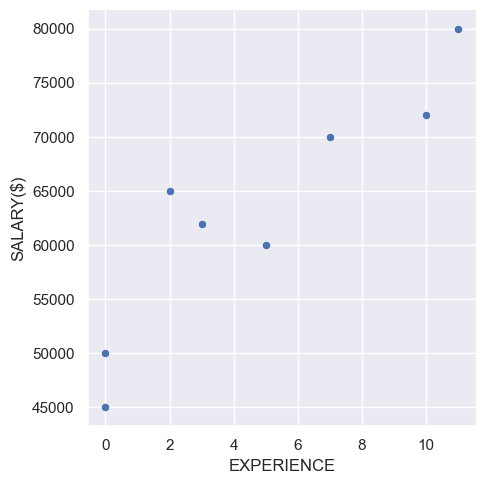

In [10]:
sns.relplot(df,x="EXPERIENCE",y="SALARY($)")

###THIS SHOWS EXPERIENCE DOES MATTER IN PREDICTION OF SALARY. IT SHOWS LINEAR RELATIONSHIP

###MODEL CREATION USING LINEAR REGRESSION

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [13]:
X=df[["EXPERIENCE","TEST_SCORE","INTERVIEW_SCORE"]]
y=df["SALARY($)"]
print(X,y)

   EXPERIENCE  TEST_SCORE  INTERVIEW_SCORE
0         0.0         8.0                9
1         0.0         8.0                6
2         5.0         6.0                7
3         2.0        10.0               10
4         7.0         9.0                6
5         3.0         7.0               10
6        10.0         8.0                7
7        11.0         7.0                8 0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: SALARY($), dtype: int64


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train,X_test,y_train,y_test,sep="\n")

   EXPERIENCE  TEST_SCORE  INTERVIEW_SCORE
0         0.0         8.0                9
7        11.0         7.0                8
2         5.0         6.0                7
4         7.0         9.0                6
3         2.0        10.0               10
6        10.0         8.0                7
   EXPERIENCE  TEST_SCORE  INTERVIEW_SCORE
1         0.0         8.0                6
5         3.0         7.0               10
0    50000
7    80000
2    60000
4    70000
3    65000
6    72000
Name: SALARY($), dtype: int64
1    45000
5    62000
Name: SALARY($), dtype: int64


In [107]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [108]:
y_pred=model.predict(X_test)


In [109]:
mse=mean_squared_error(y_test,y_pred)
mse

4898623.265315437

In [110]:
print(model.coef_)
print(model.intercept_)

[2699.12037595 2044.82467767 1635.73924569]
21249.909627665977


In [111]:
model.predict([[0,9,9]])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54374.98493794])

In [112]:
score=r2_score(y_test,y_pred)
score

0.9321989859471912

THE ACCURACY OF THE GIVEN MODEL IS 93.219% 

1) IT CAN BE IMPROVED BY INCREASE THE DATA SIZE OF THE MODEL

2) BY USING SOME OTHER ALGORITHM RATHER THAN LINEAR REGRESSION